## Dataset Preparation

In [1]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image

In [2]:
import matplotlib.pyplot as plt

In [12]:
p=Path(r"C:\Users\hp\Desktop\images")
dirs=p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

image_data = []
labels = []

for folder_name in dirs:
#     print(type(folder_name))
    label=str(folder_name).split('\\')[-1][:-1]
    
    for img_path in folder_name.glob("*jpg"):
#         print(img_path)
        img=image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        

In [13]:
print(len(image_data),len(labels))

808 808


In [14]:
# Convert this into numpy array
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly Shuffle our Data!

In [16]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)
# * is used to unzip

### data visualization

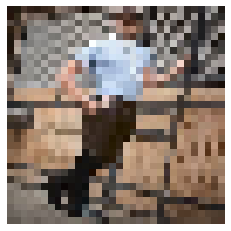

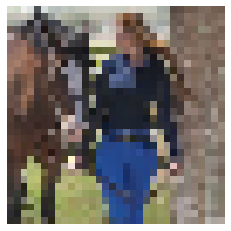

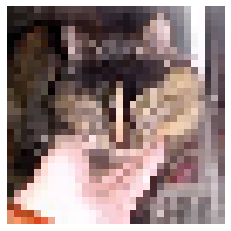

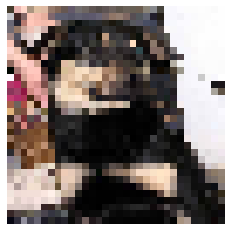

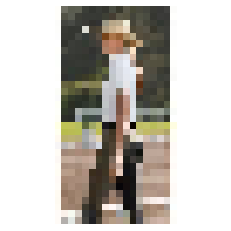

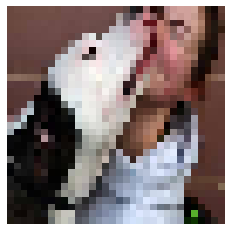

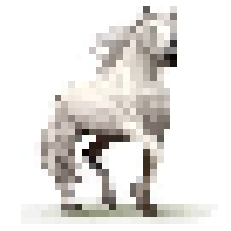

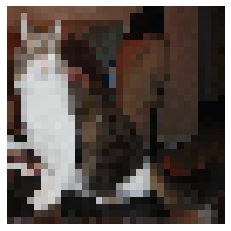

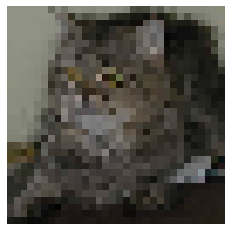

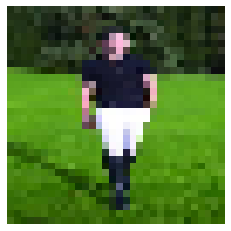

In [17]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

## SVM Classifier

In [48]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### We need to convert data for One-for-One classifcation!

In [ ]:
# we will make dictionary with keys as labels and values as corresponding values

In [22]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [23]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [29]:
def classwisedata(x,y):
    data={}
    
    for i in range(CLASSES):
        data[i]=[]
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [30]:
data=classwisedata(image_data,labels)

In [38]:
data

{0: array([[0.12941177, 0.10980392, 0.09803922, ..., 0.6666667 , 0.6313726 ,
         0.6431373 ],
        [0.41960785, 0.29411766, 0.21176471, ..., 0.07843138, 0.05882353,
         0.04705882],
        [0.5647059 , 0.57254905, 0.52156866, ..., 0.14509805, 0.11764706,
         0.09411765],
        ...,
        [0.40784314, 0.41568628, 0.4117647 , ..., 0.49019608, 0.5019608 ,
         0.52156866],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.5921569 , 0.6313726 ,
         0.39215687],
        [0.21960784, 0.23137255, 0.26666668, ..., 0.62352943, 0.67058825,
         0.6156863 ]], dtype=float32),
 1: array([[0.27058825, 0.23529412, 0.1764706 , ..., 0.09019608, 0.09019608,
         0.09019608],
        [0.41568628, 0.28235295, 0.24705882, ..., 0.29411766, 0.18039216,
         0.16470589],
        [0.7411765 , 0.6313726 , 0.5764706 , ..., 0.6392157 , 0.54509807,
         0.49803922],
        ...,
        [0.16470589, 0.18431373, 0.15686275, ..., 0.29803923, 0.23529412,
         0.24

In [39]:
def getDataPairForSVM(d1,d2):
    
    l1,l2=d1.shape[0],d2.shape[0]
    
    samples=l1+l2
    features=d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

In [51]:
mySVM=SVM()

In [69]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

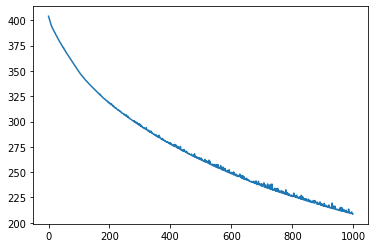

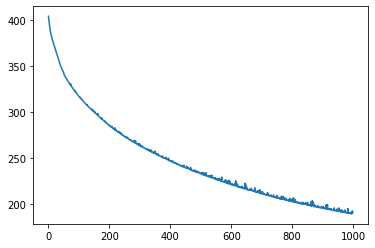

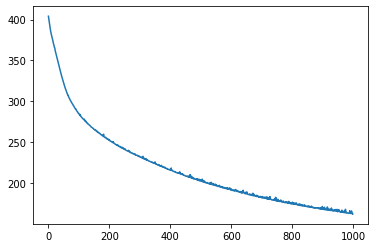

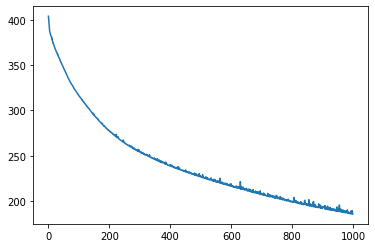

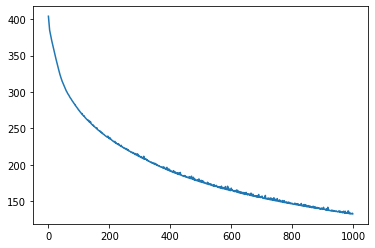

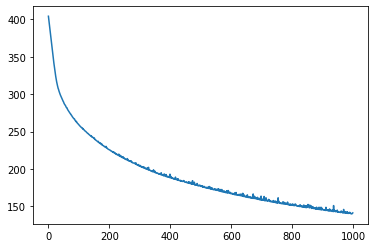

In [70]:
svm_classifiers = trainSVMs(image_data,labels)

In [71]:
svm_classifiers

{0: {1: (array([[-0.0093007 , -0.00335849,  0.00119258, ...,  0.00858486,
            0.00929845,  0.02170176]]),
   0.04171000000000009),
  2: (array([[-0.01484149,  0.00089673,  0.01808443, ...,  0.0235101 ,
            0.02495676, -0.00013594]]),
   -0.10756000000000016),
  3: (array([[0.03054167, 0.04127062, 0.05296245, ..., 0.02958666, 0.04263111,
           0.03032514]]),
   -0.03203999999999988)},
 1: {2: (array([[-0.01696613, -0.00022854,  0.01555129, ...,  0.01225974,
            0.01303764, -0.01662026]]),
   -0.11898999999999994),
  3: (array([[0.03310978, 0.03389858, 0.04409487, ..., 0.01998251, 0.02547112,
           0.00701471]]),
   -0.054600000000000024)},
 2: {3: (array([[0.0396215 , 0.03094782, 0.0262268 , ..., 0.01646149, 0.02033873,
           0.03004569]]),
   0.07145000000000006)},
 3: {}}

## Prediction

In [72]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [73]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
#     print(count)
#     return
    return final_prediction

In [78]:
print(predict(image_data[1]))
print(labels[1])

3
3


In [75]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [76]:
accuracy(image_data,labels)

0.620049504950495